https://www.cloudskillsboost.google/course_sessions/4856465/labs/413159


#Przegląd

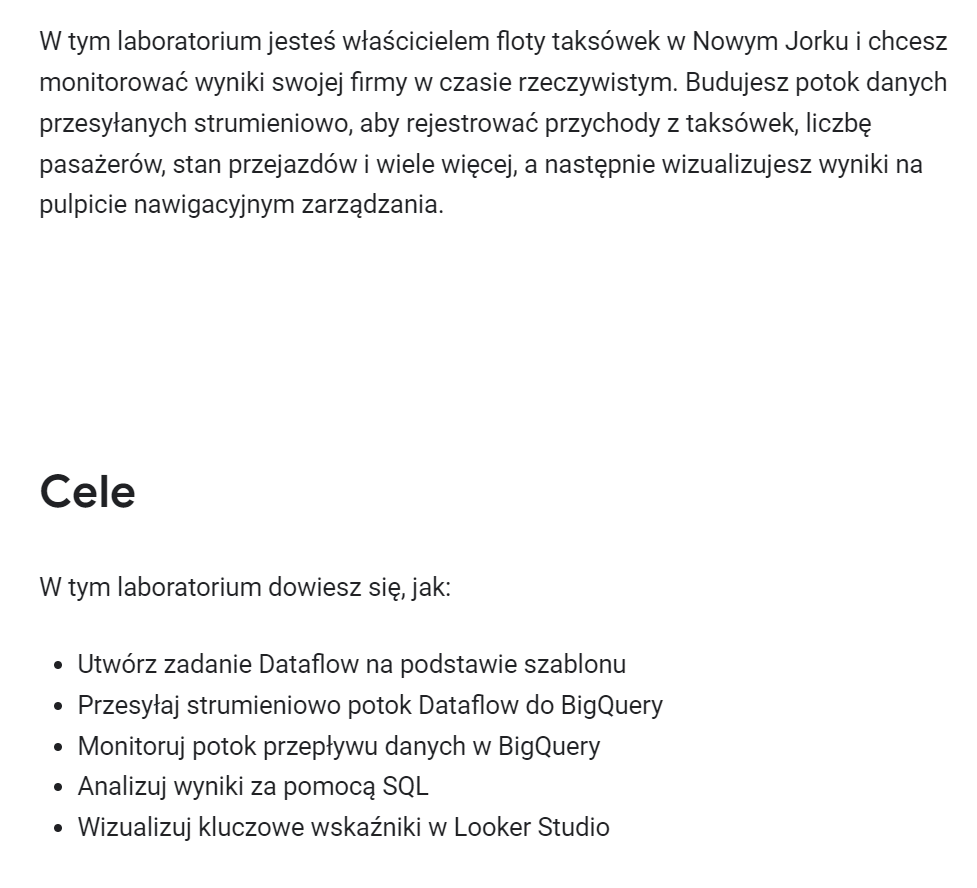

#Zadanie 1. Utwórz zbiór danych BigQuery

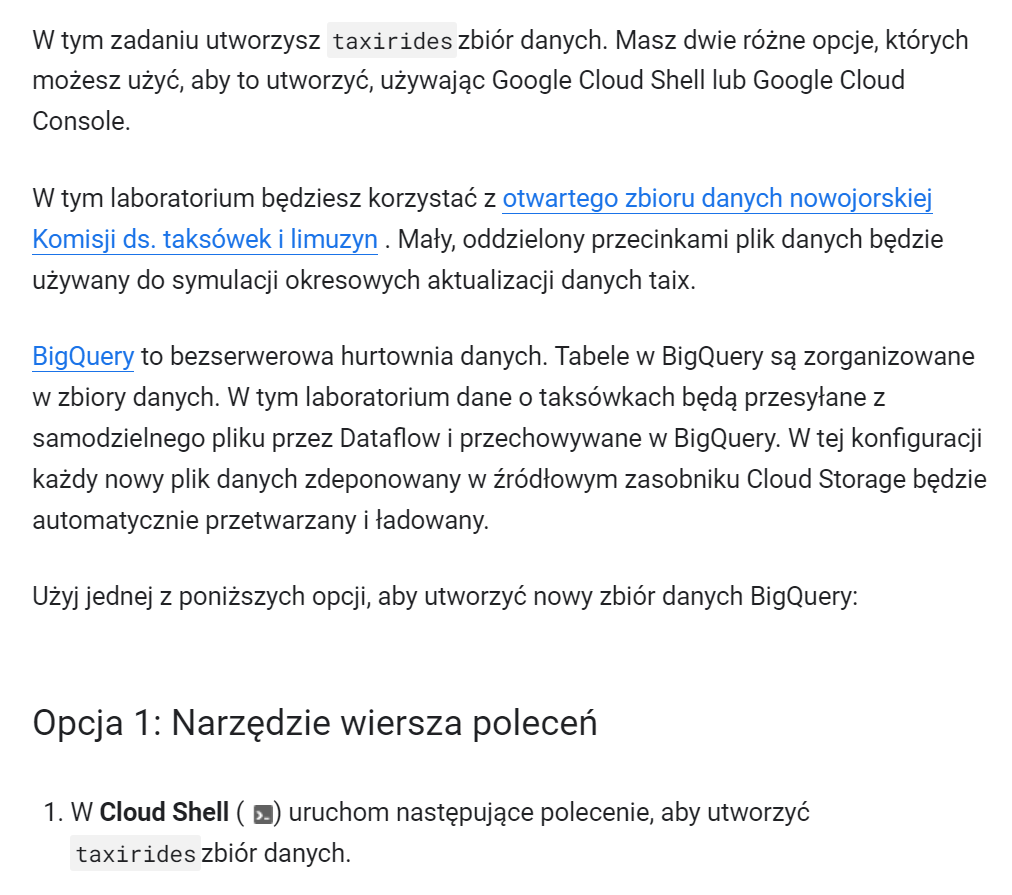

https://opendata.cityofnewyork.us/

In [ ]:
bq --location=us-central1 mk taxirides

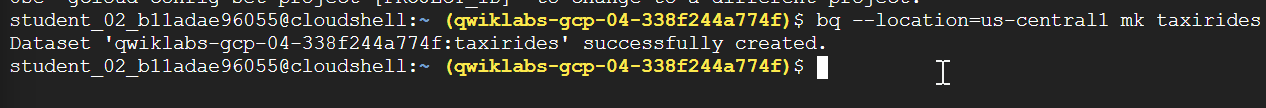

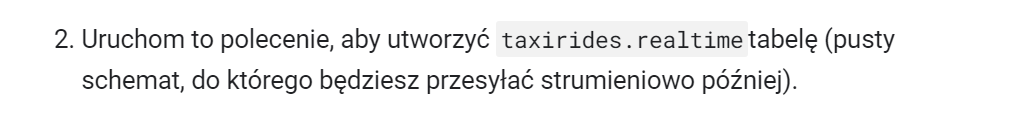

In [ ]:
bq --location=us-central1 mk \

--time_partitioning_field timestamp \

--schema ride_id:string,point_idx:integer,latitude:float,longitude:float,\

timestamp:timestamp,meter_reading:float,meter_increment:float,ride_status:string,\

passenger_count:integer -t taxirides.realtime

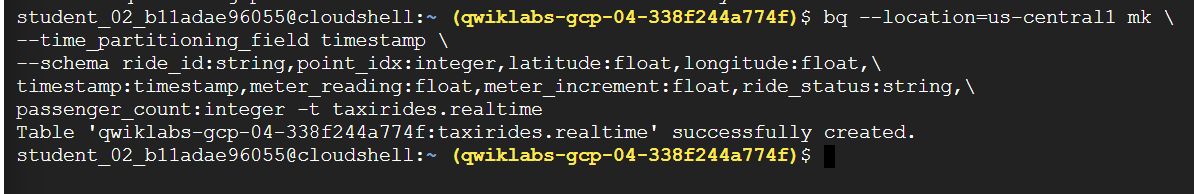

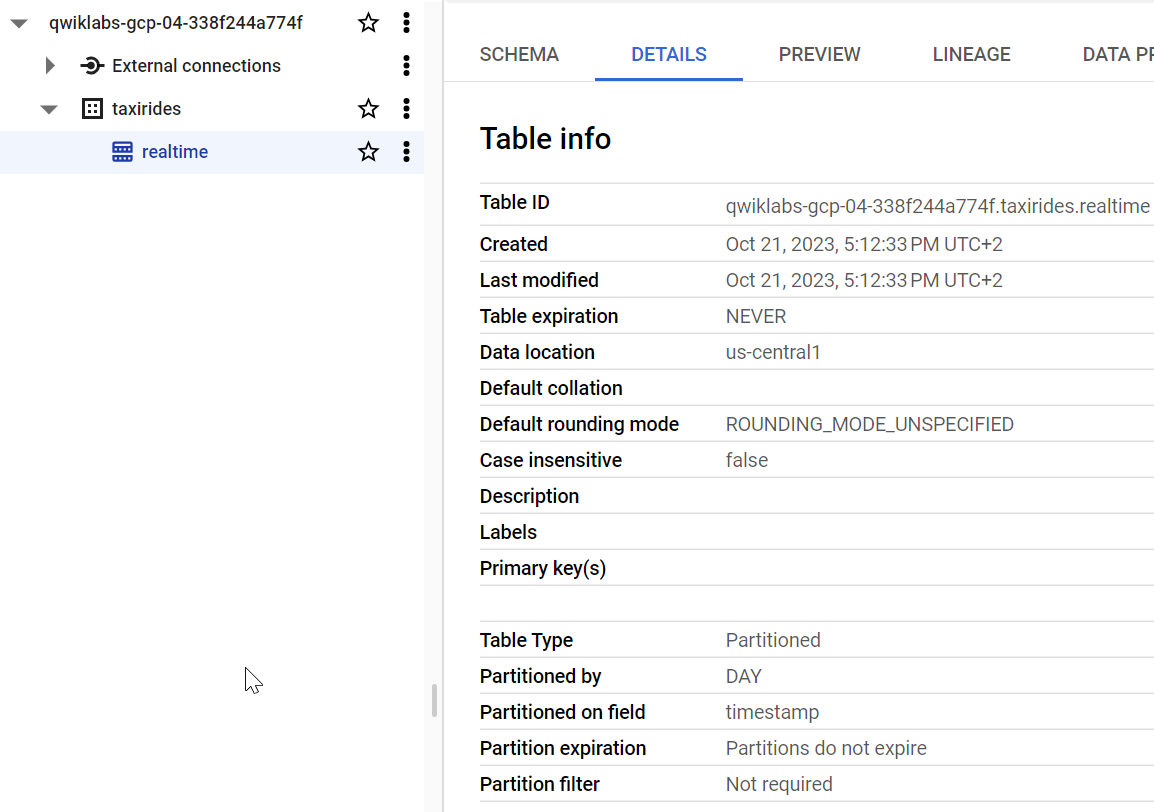

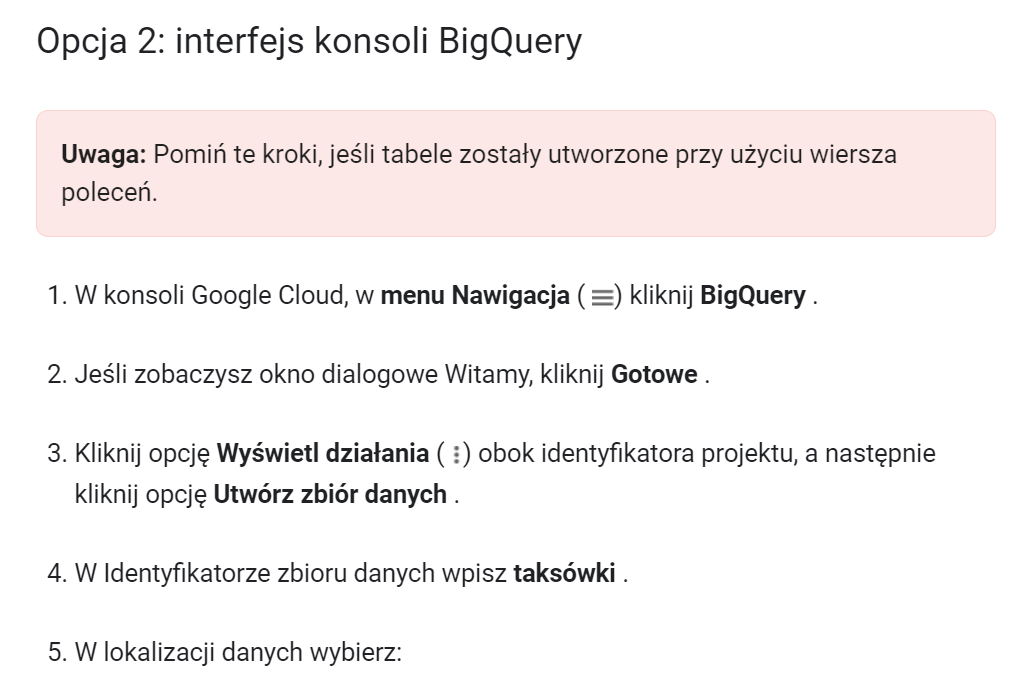

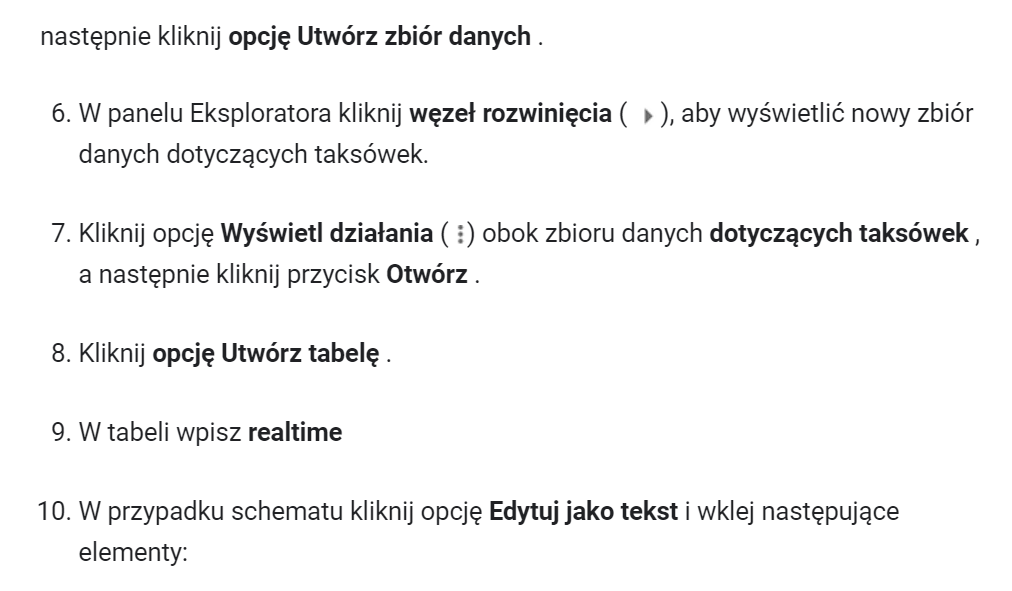

In [ ]:
ride_id:string,
point_idx:integer,
latitude:float,
longitude:float,
timestamp:timestamp,
meter_reading:float,
meter_increment:float,
ride_status:string,
passenger_count:integer

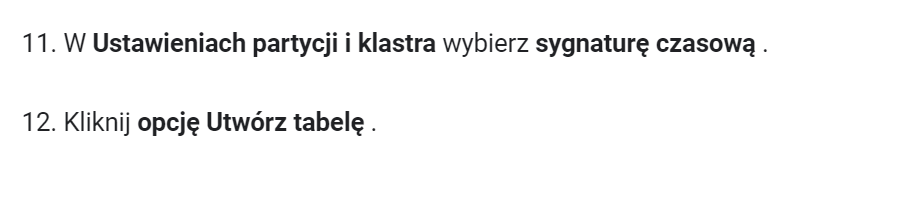

#Zadanie 2. Skopiuj wymagane artefakty laboratoryjne

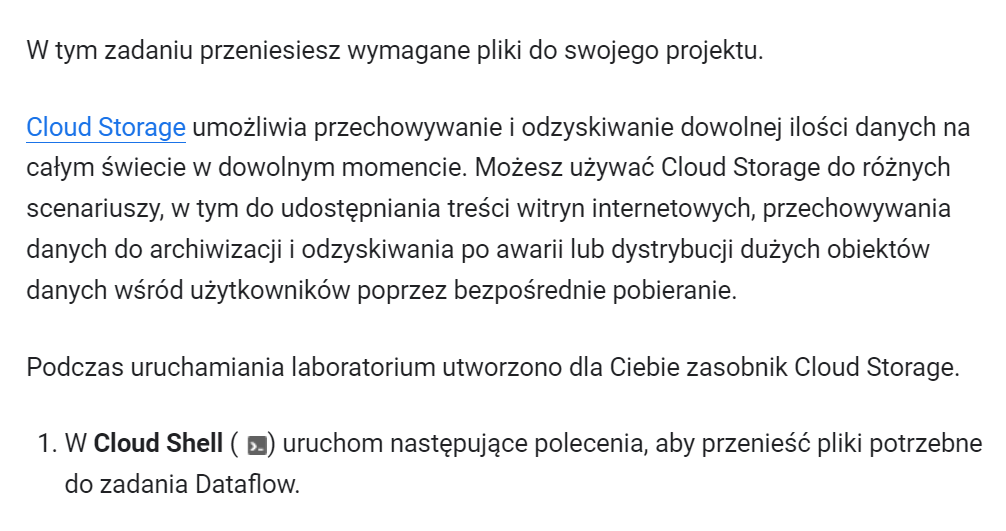

In [ ]:
gcloud storage cp gs://cloud-training/bdml/taxisrcdata/schema.json  gs://qwiklabs-gcp-04-338f244a774f-bucket/tmp/schema.json
gcloud storage cp gs://cloud-training/bdml/taxisrcdata/transform.js  gs://qwiklabs-gcp-04-338f244a774f-bucket/tmp/transform.js
gcloud storage cp gs://cloud-training/bdml/taxisrcdata/rt_taxidata.csv  gs://qwiklabs-gcp-04-338f244a774f-bucket/tmp/rt_taxidata.csv

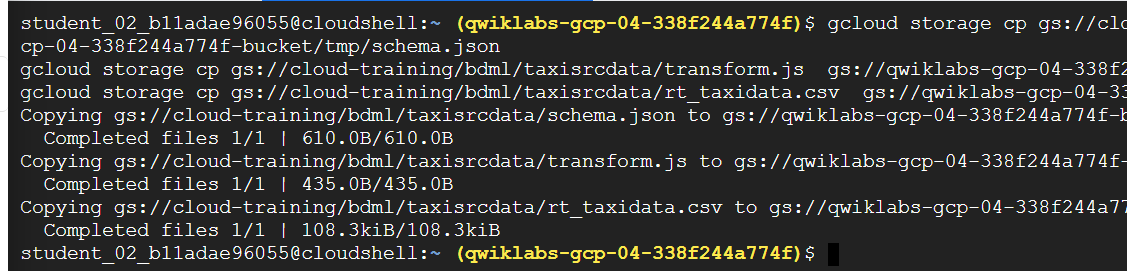

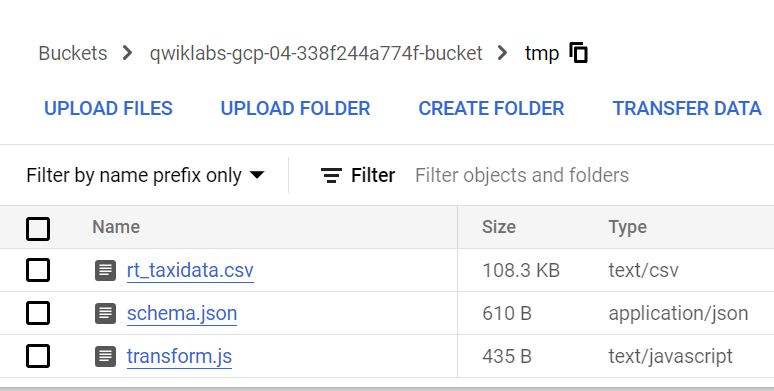

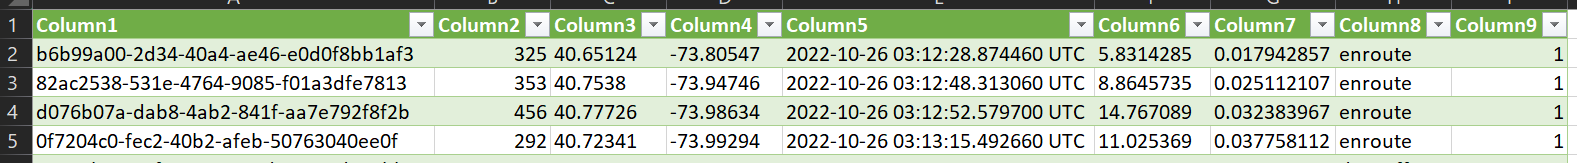

In [ ]:
{
    "BigQuery Schema": [{
        "name": "ride_id",
        "type": "STRING"
    }, {
        "name": "point_idx",
        "type": "INTEGER"
    }, {
        "name": "latitude",
        "type": "FLOAT"
    }, {
        "name": "longitude",
        "type": "FLOAT"
    }, {
        "name": "timestamp",
        "type": "TIMESTAMP"
    }, {
        "name": "meter_reading",
        "type": "FLOAT"
    }, {
        "name": "meter_increment",
        "type": "FLOAT"
    }, {
        "name": "ride_status",
        "type": "STRING"
    }, {
        "name": "passenger_count",
        "type": "INTEGER"
    }]
}

In [ ]:
%%javascript

function transform(line) {
var values = line.split(',');
var custObj = new Object();
custObj.ride_id = values[0];
custObj.point_idx = values[1];
custObj.latitude = values[2];
custObj.longitude = values[3];
custObj.timestamp = values[4];
custObj.meter_reading = values[5];
custObj.meter_increment = values[6];
custObj.ride_status = values[7];
custObj.passenger_count = values[8];
var outJson = JSON.stringify(custObj);
return outJson;
}

#Zadanie 3. Skonfiguruj potok przepływu danych

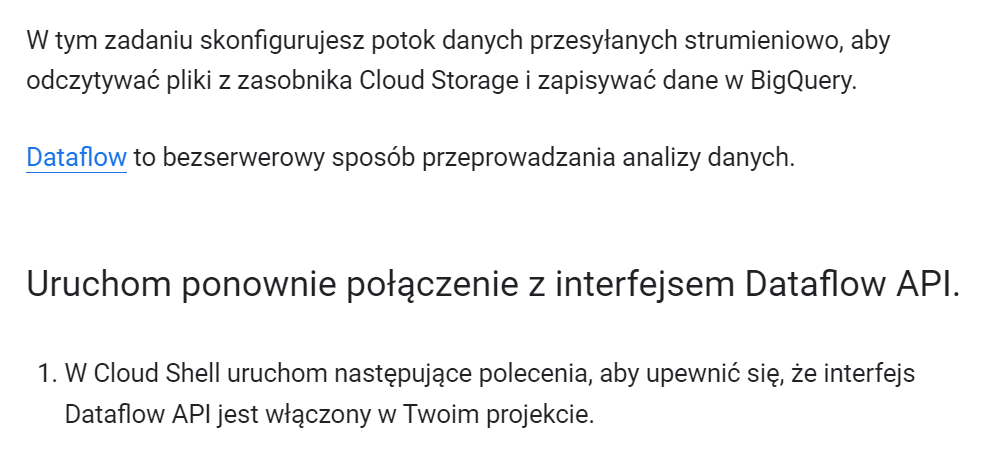

In [ ]:
gcloud services disable dataflow.googleapis.com
gcloud services enable dataflow.googleapis.com

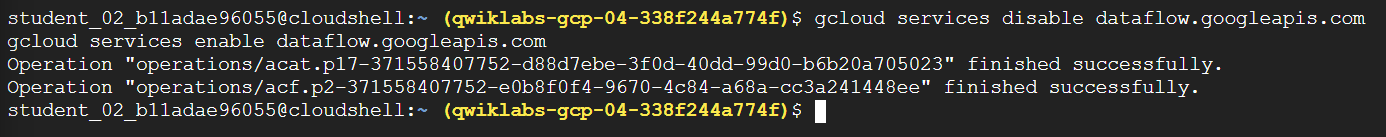

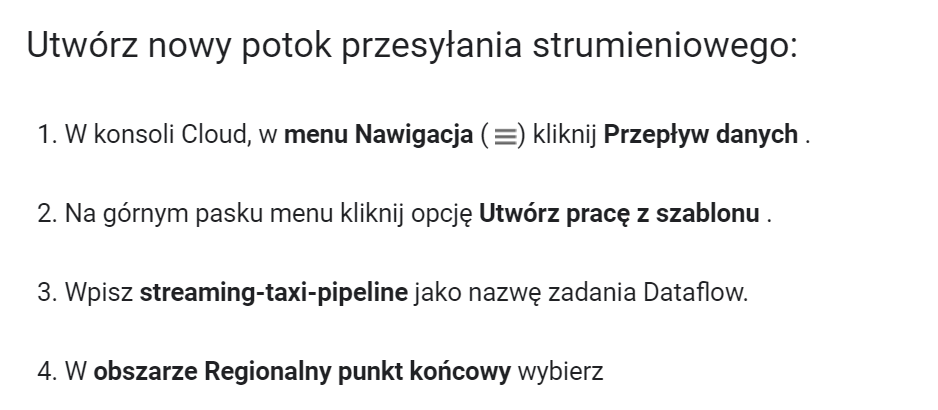

In [ ]:
us-central1

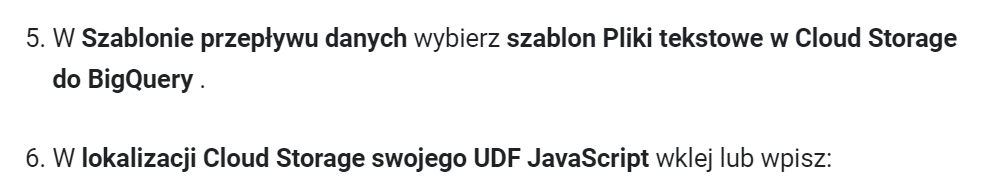

In [ ]:
# Project_ID-bucket/tmp/transform.js

qwiklabs-gcp-04-338f244a774f-bucket/tmp/transform.js

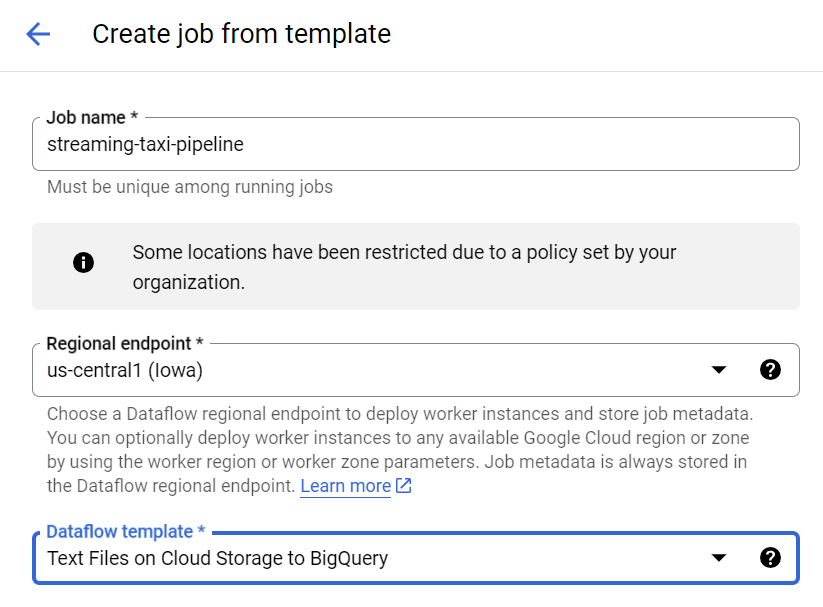

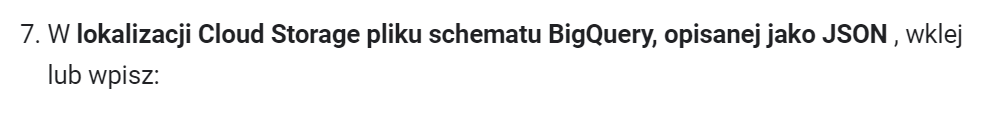

In [ ]:
# Project_ID-bucket/tmp/schema.json

qwiklabs-gcp-04-338f244a774f-bucket/tmp/schema.json

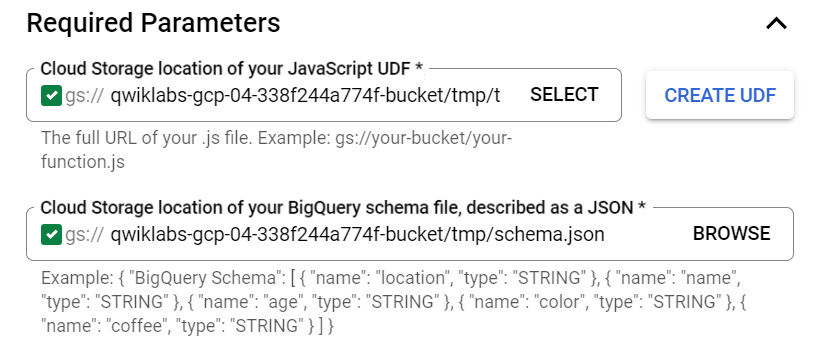

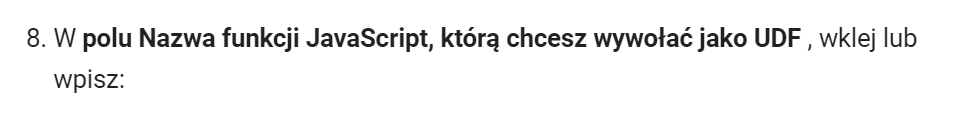

In [ ]:
transform

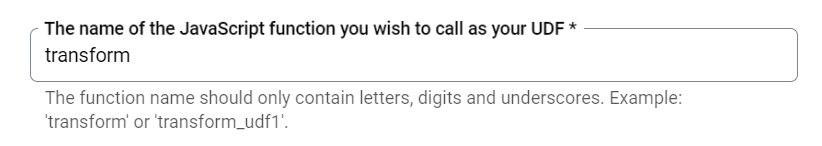

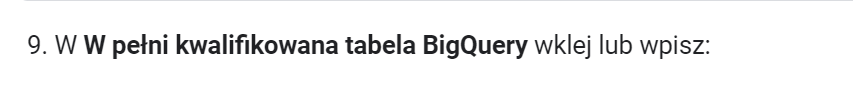

In [ ]:
# Project_ID:taxirides.realtime

qwiklabs-gcp-04-338f244a774f:taxirides.realtime

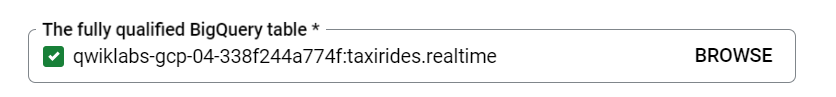

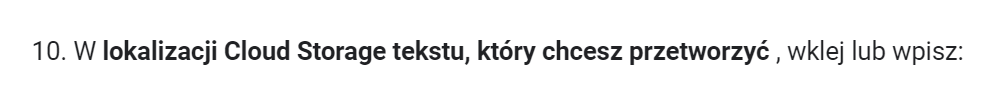

In [ ]:
# gs://Project_ID-bucket/tmp/rt_taxidata.csv

gs://qwiklabs-gcp-04-338f244a774f-bucket/tmp/rt_taxidata.csv

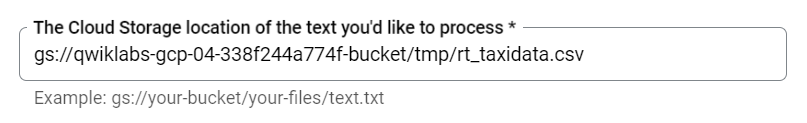

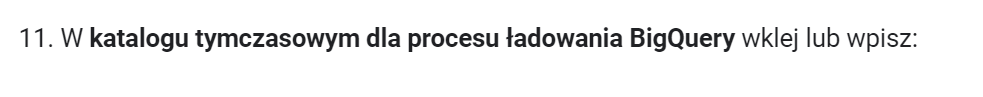

In [ ]:
# Project_ID-bucket/tmp

qwiklabs-gcp-04-338f244a774f-bucket/tmp

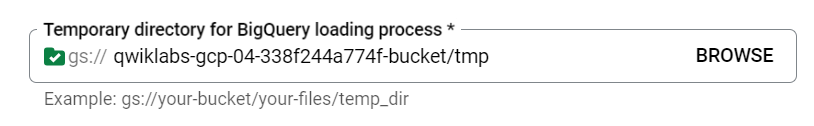

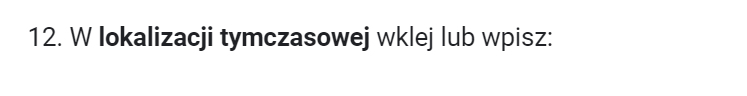

In [ ]:
Project_ID-bucket/tmp

qwiklabs-gcp-04-338f244a774f-bucket/tmp

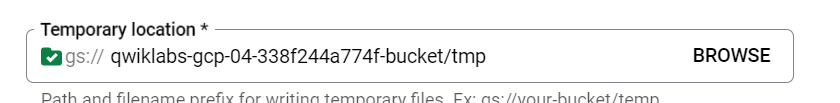

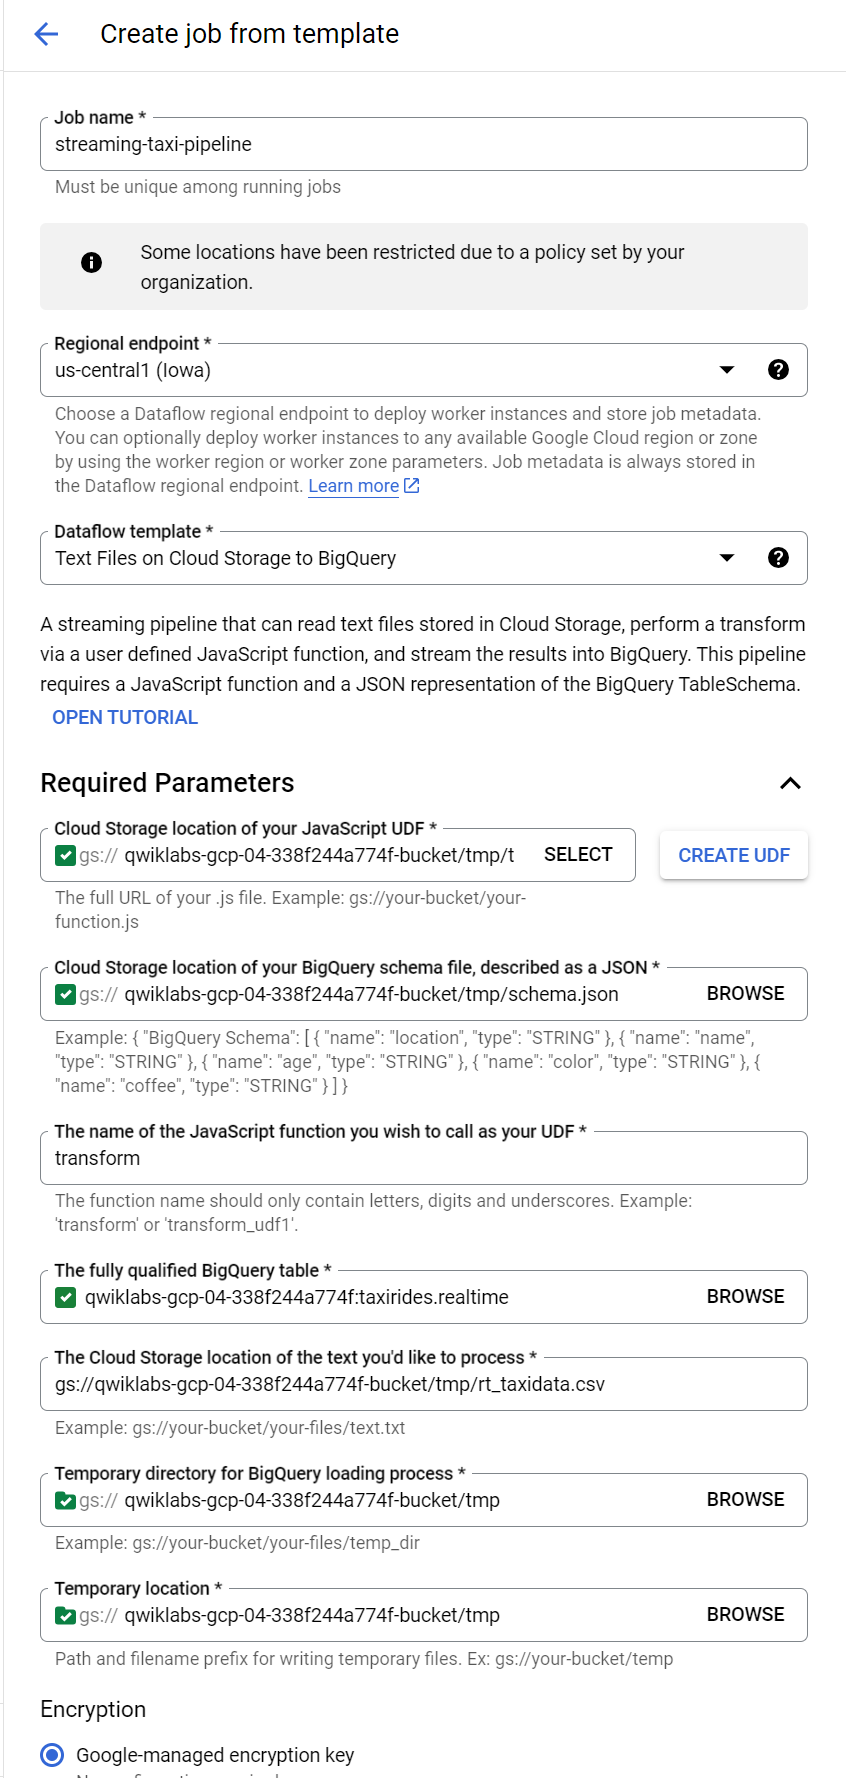

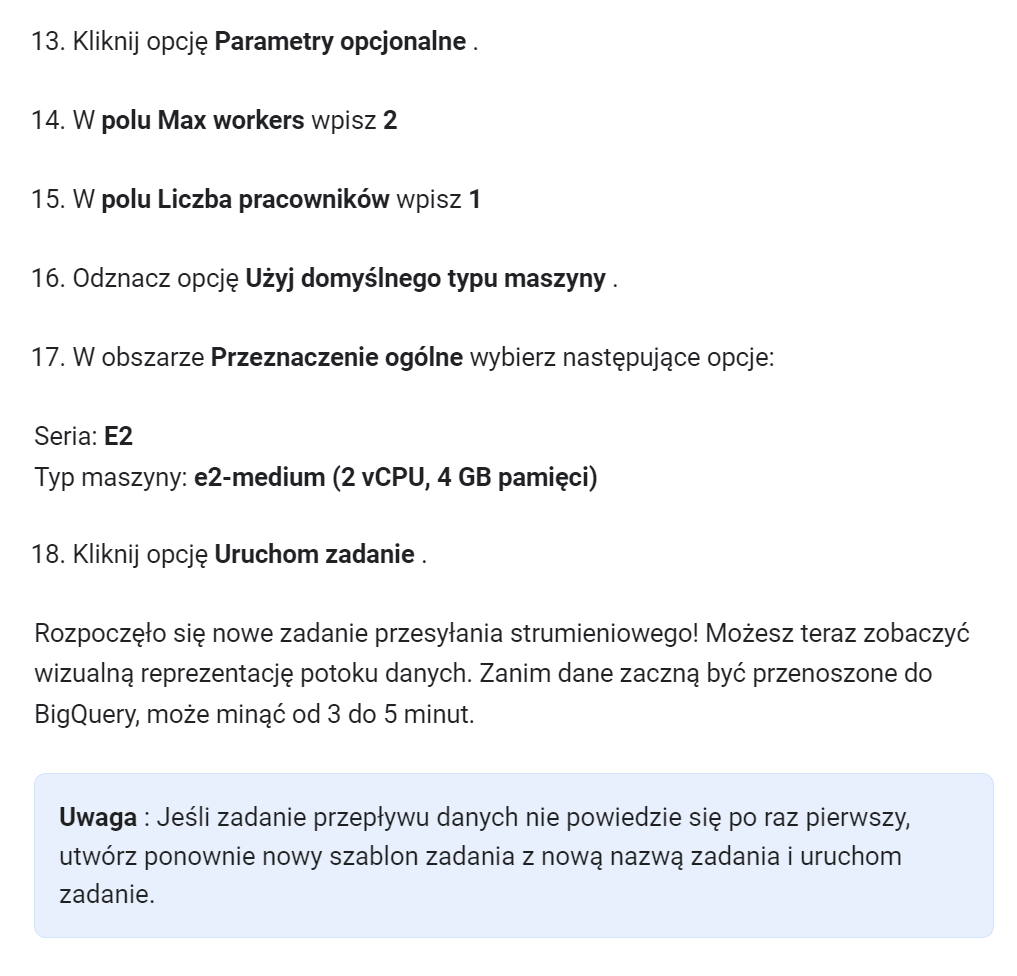

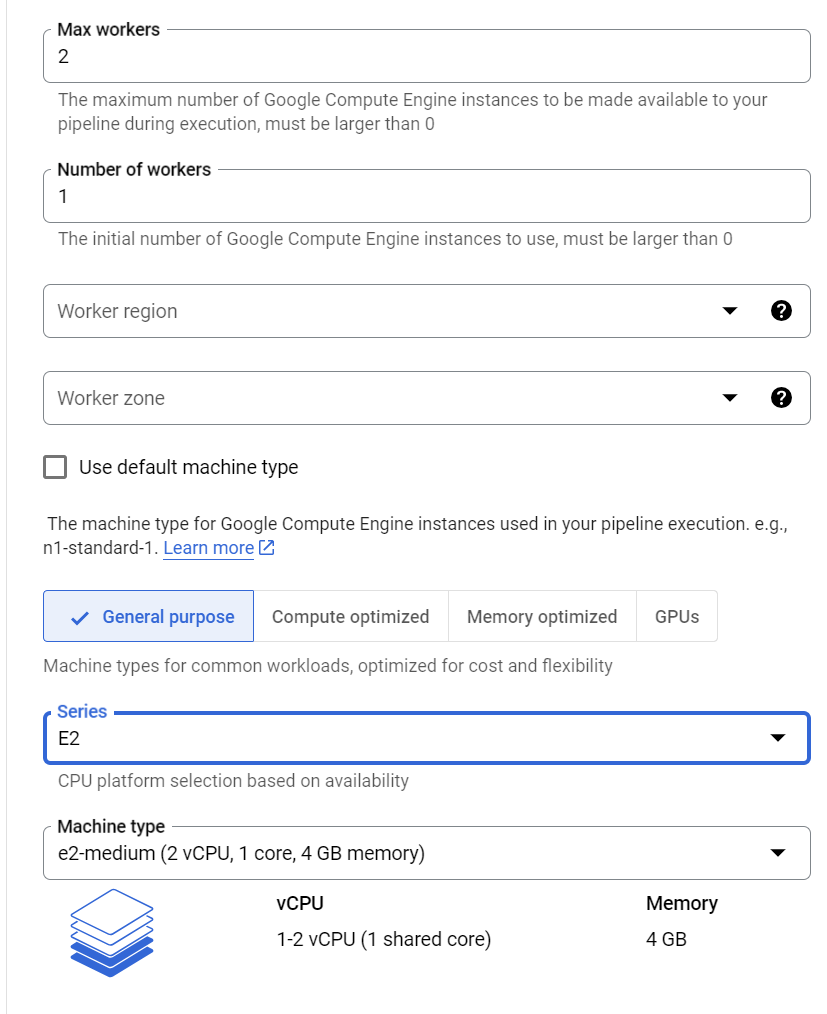

#Zadanie 4. Przeanalizuj dane taksówek za pomocą BigQuery

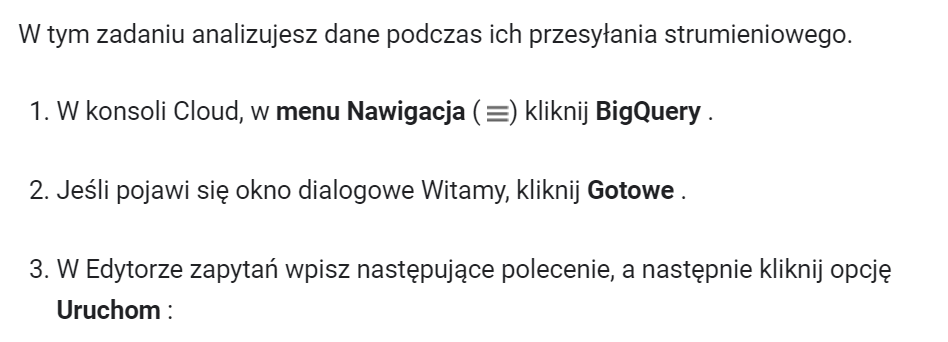

In [ ]:
%%bigquery

SELECT * FROM taxirides.realtime LIMIT 10

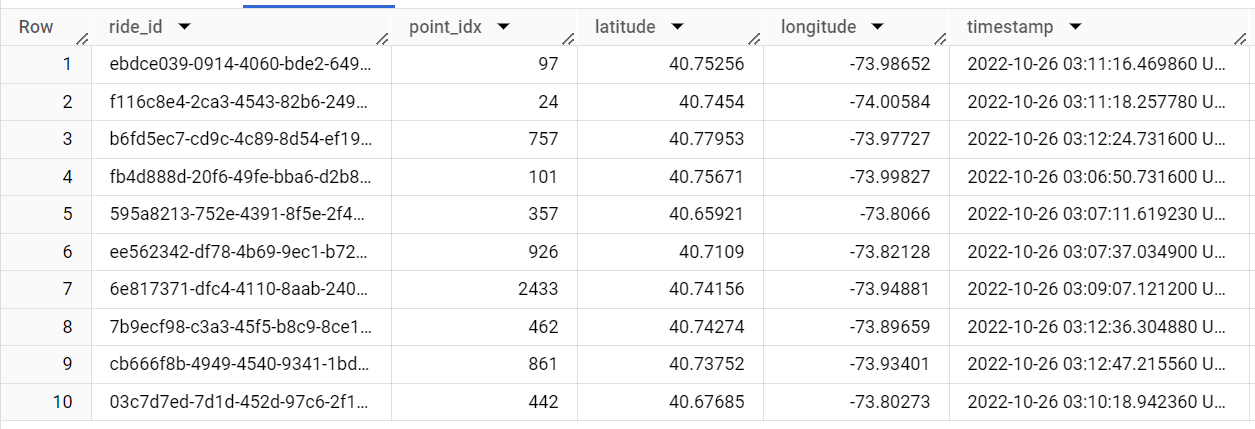

#Zadanie 5. Wykonaj agregacje na strumieniu na potrzeby raportowania

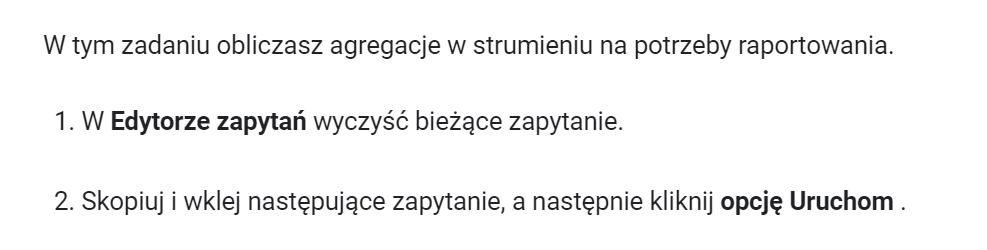

In [ ]:
%%bigquery

WITH streaming_data AS (

SELECT
  timestamp,
  TIMESTAMP_TRUNC(timestamp, HOUR, 'UTC') AS hour,
  TIMESTAMP_TRUNC(timestamp, MINUTE, 'UTC') AS minute,
  TIMESTAMP_TRUNC(timestamp, SECOND, 'UTC') AS second,
  ride_id,
  latitude,
  longitude,
  meter_reading,
  ride_status,
  passenger_count
FROM
  taxirides.realtime
ORDER BY timestamp DESC
LIMIT 1000

)

# calculate aggregations on stream for reporting:
SELECT
 ROW_NUMBER() OVER() AS dashboard_sort,
 minute,
 COUNT(DISTINCT ride_id) AS total_rides,
 SUM(meter_reading) AS total_revenue,
 SUM(passenger_count) AS total_passengers
FROM streaming_data
GROUP BY minute, timestamp

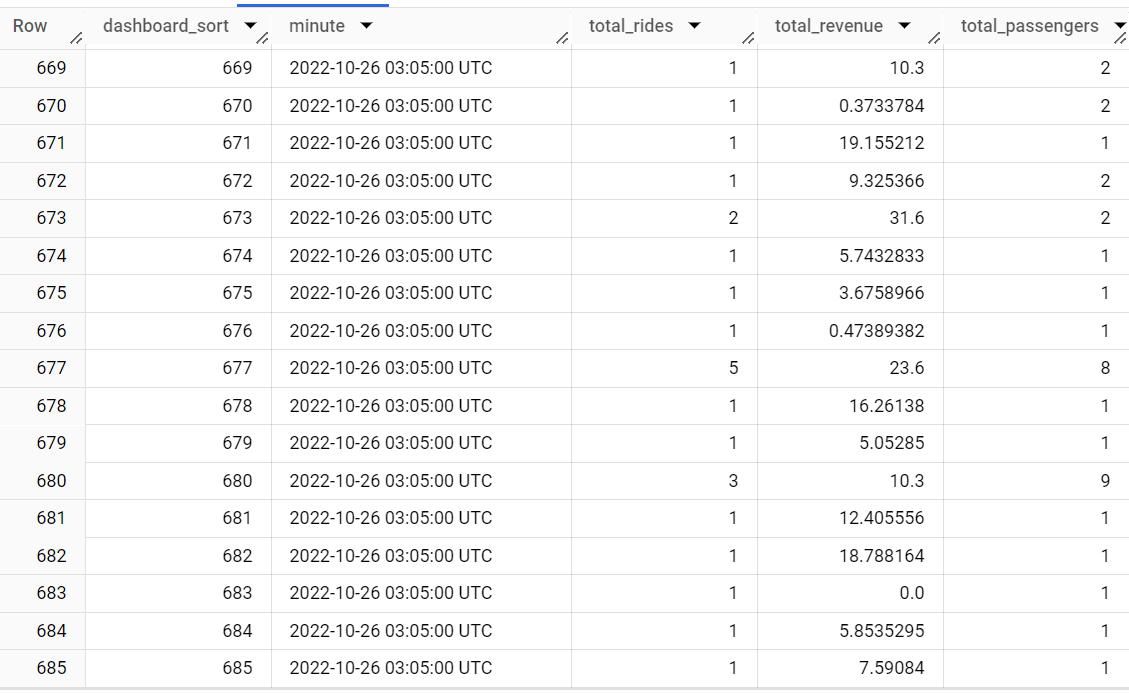

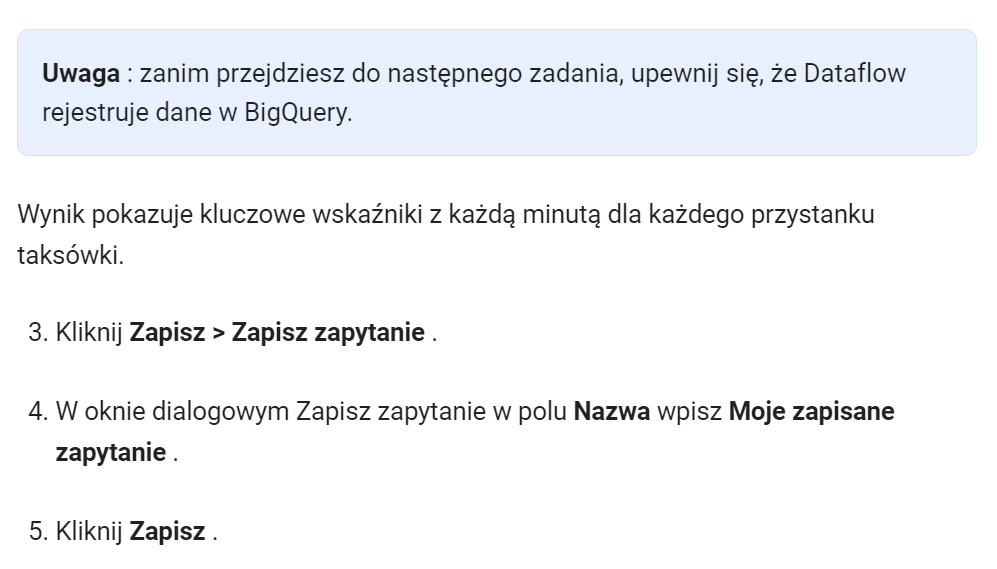

#Zadanie 6. Zatrzymaj zadanie przepływu danych

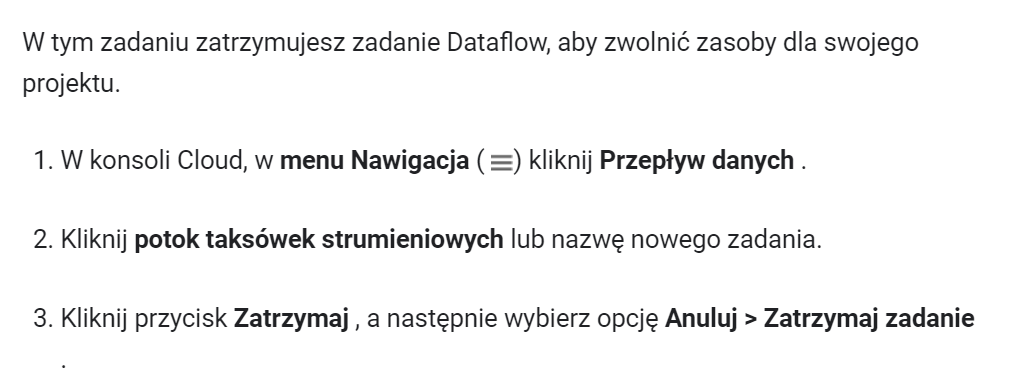

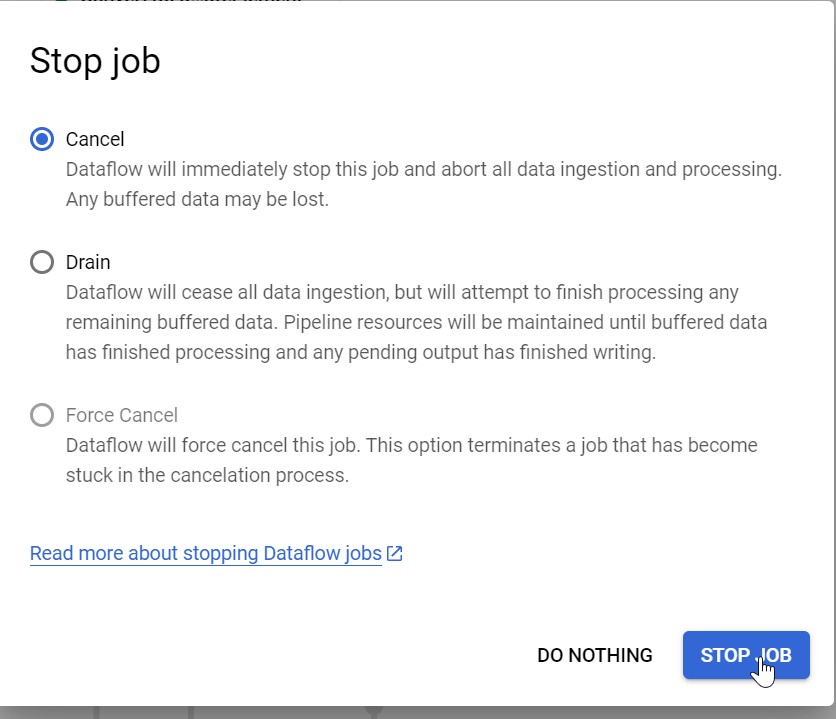

#Zadanie 7. Utwórz dashboard czasu rzeczywistego

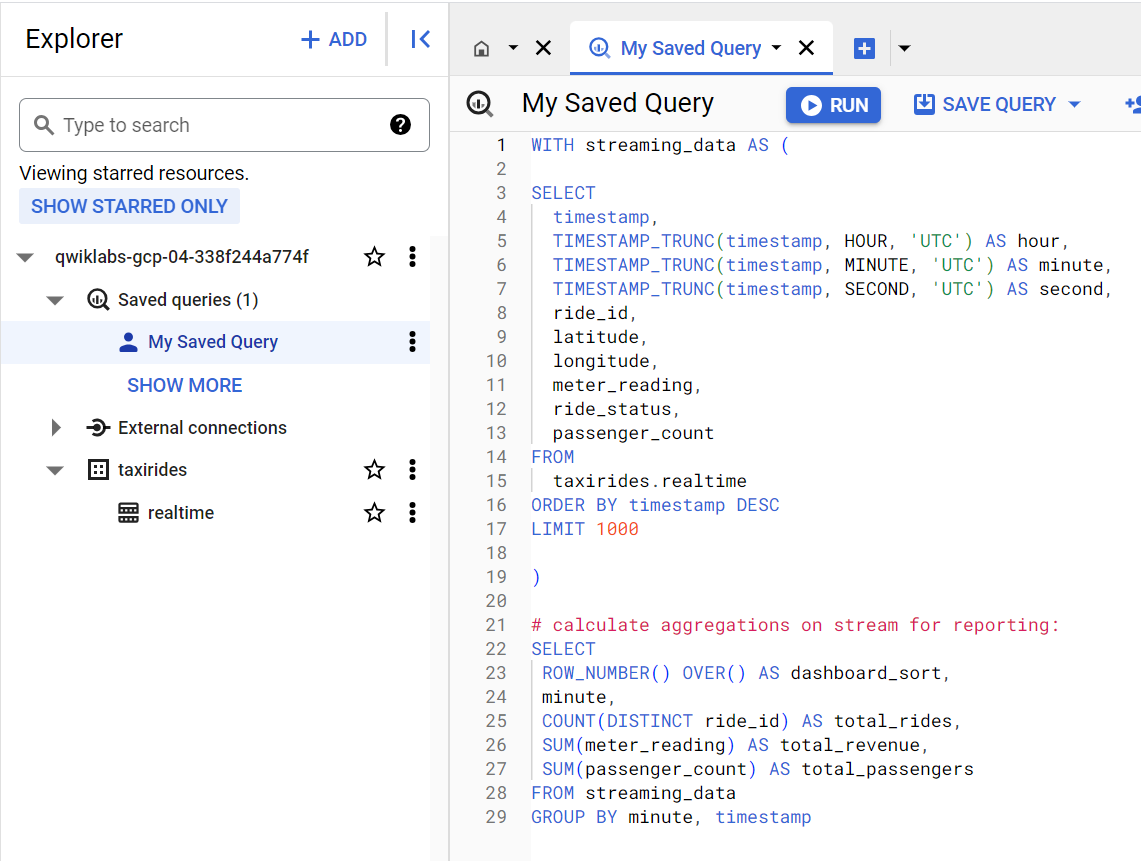

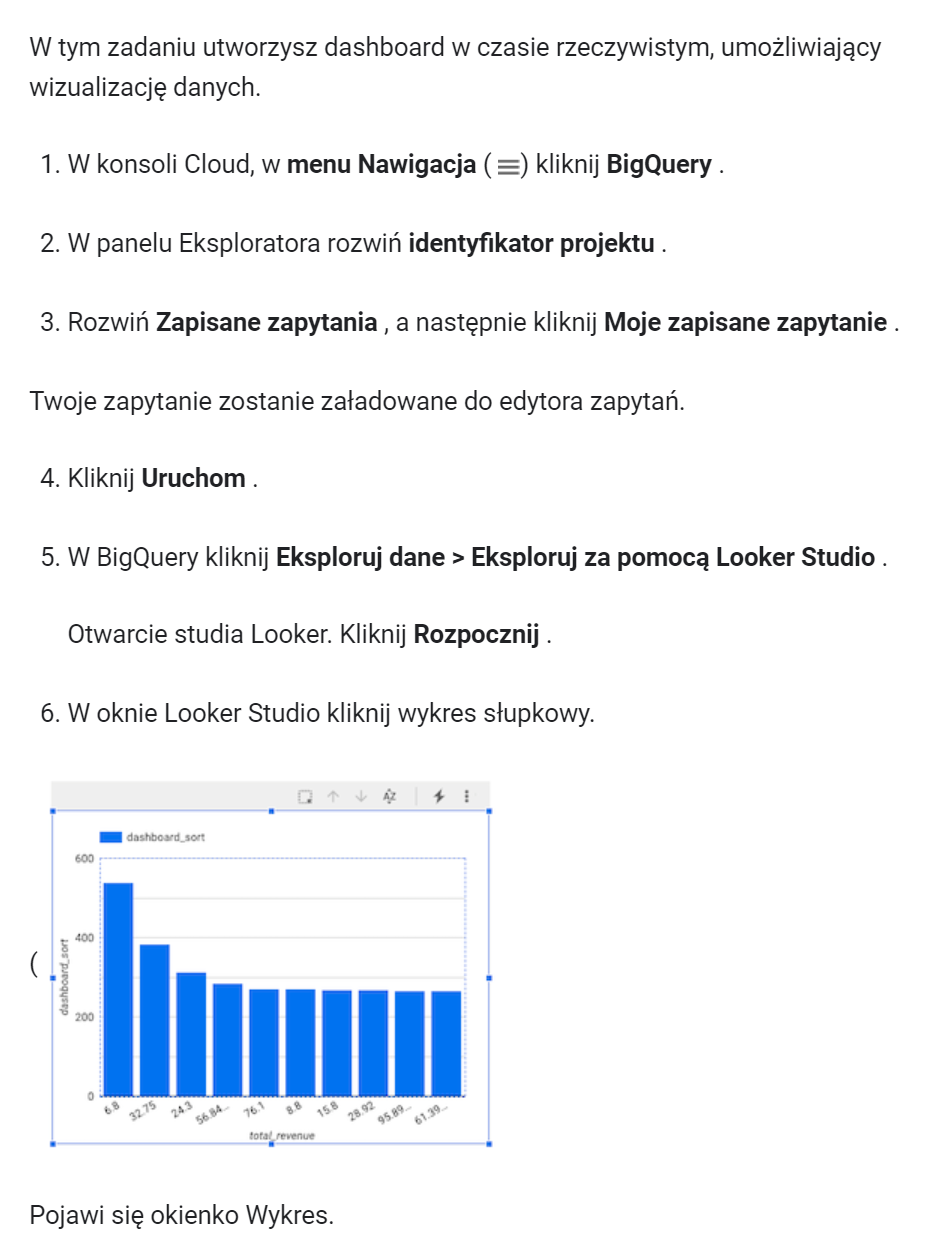

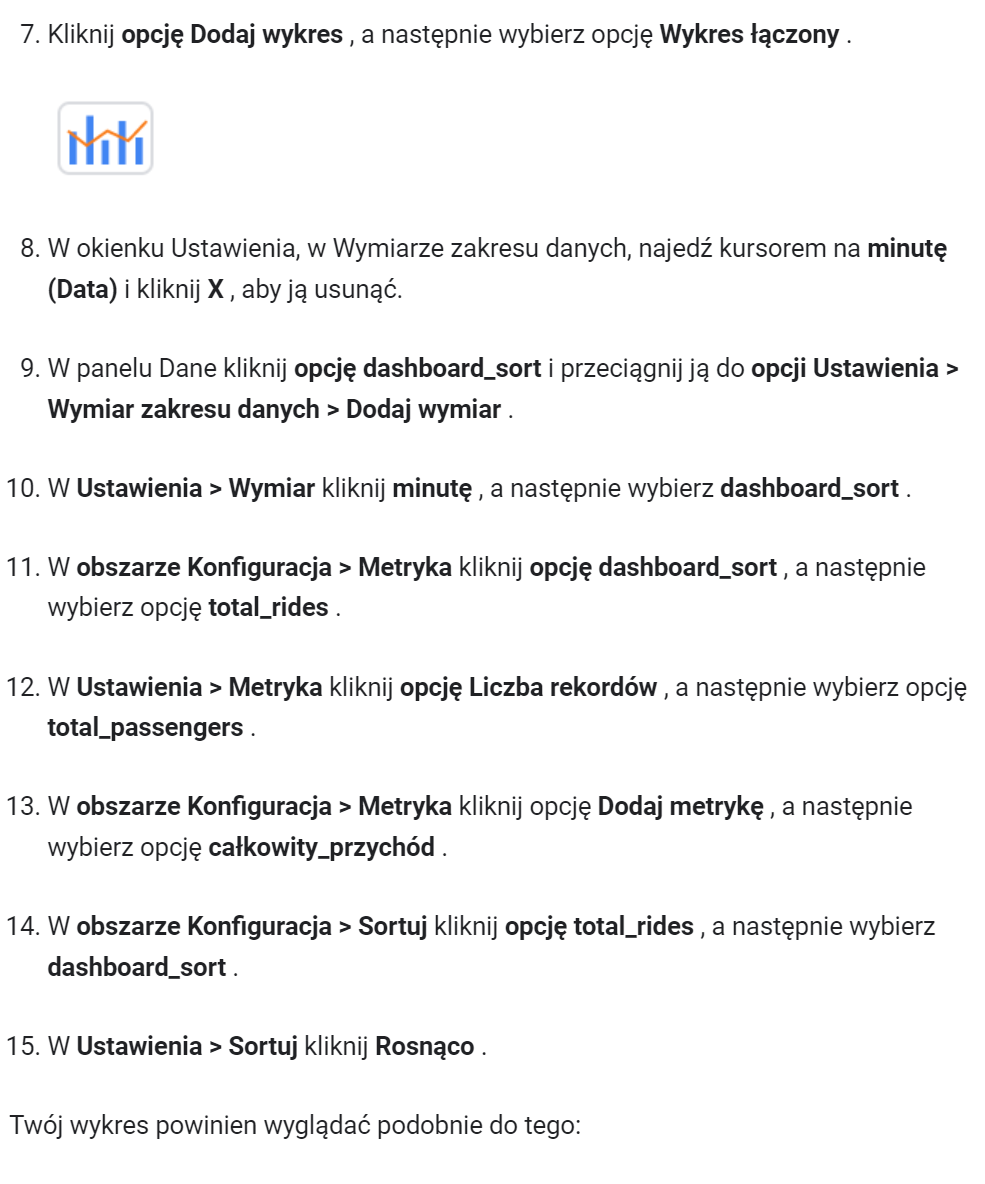

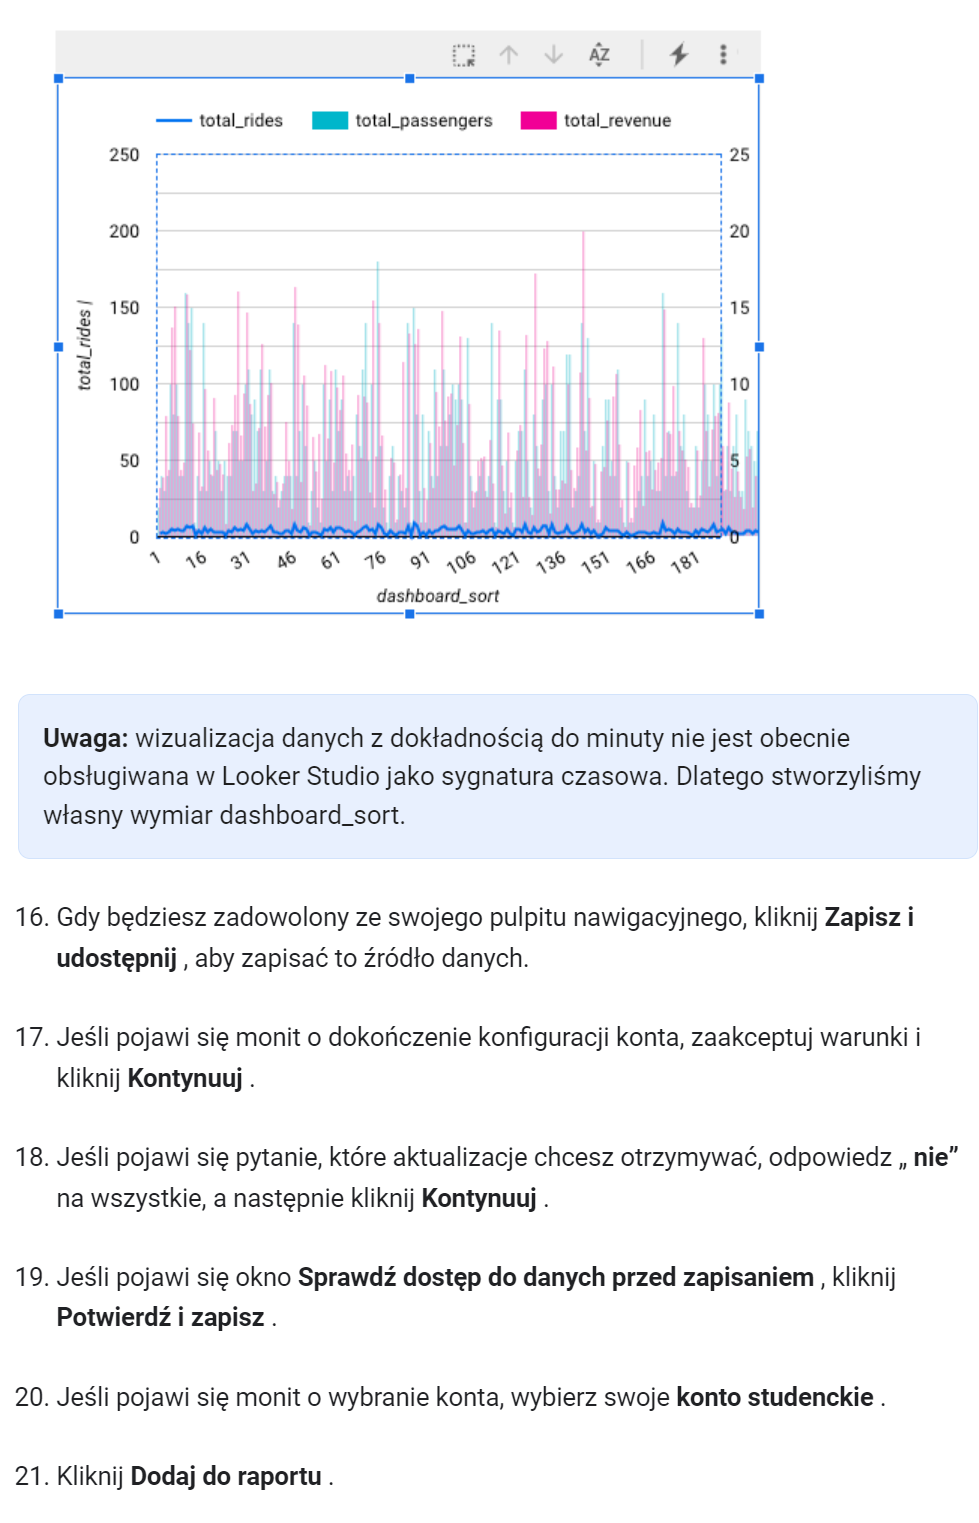

#Zadanie 8. Utwórz dashboard szeregów czasowych

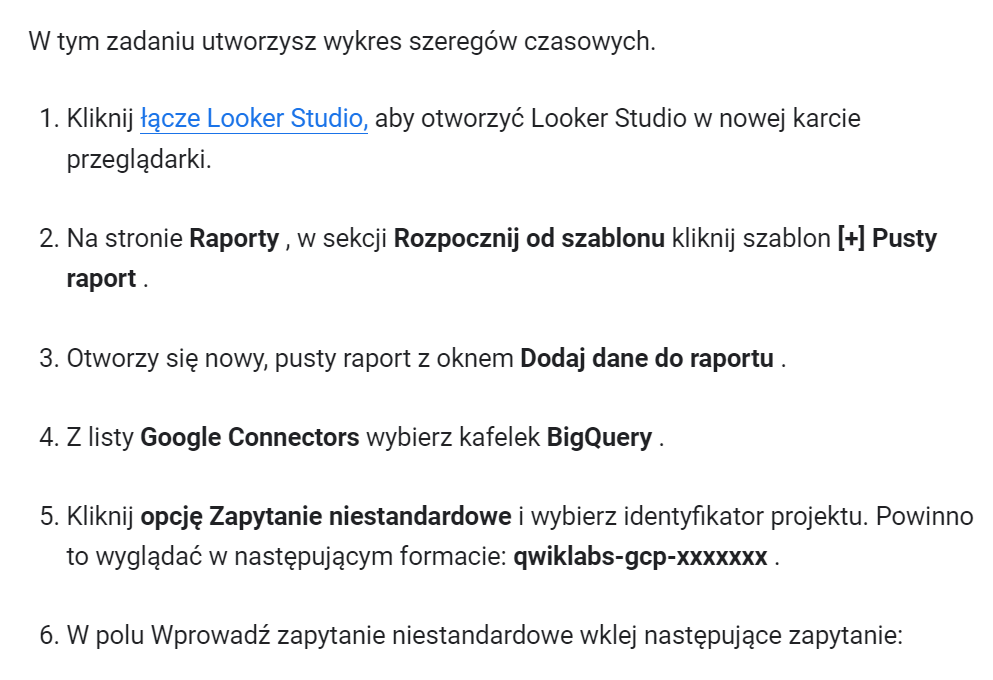

In [ ]:
%%bigquery

SELECT
  *
FROM
  taxirides.realtime
WHERE
  ride_status='enroute'

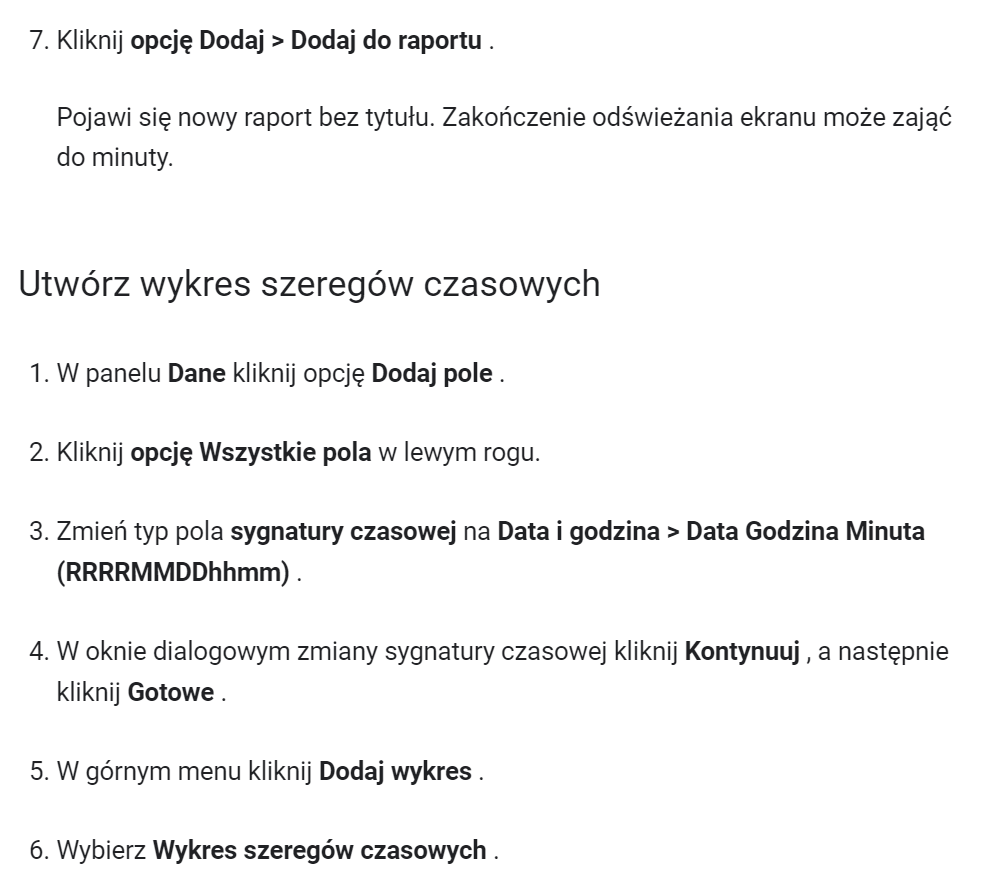

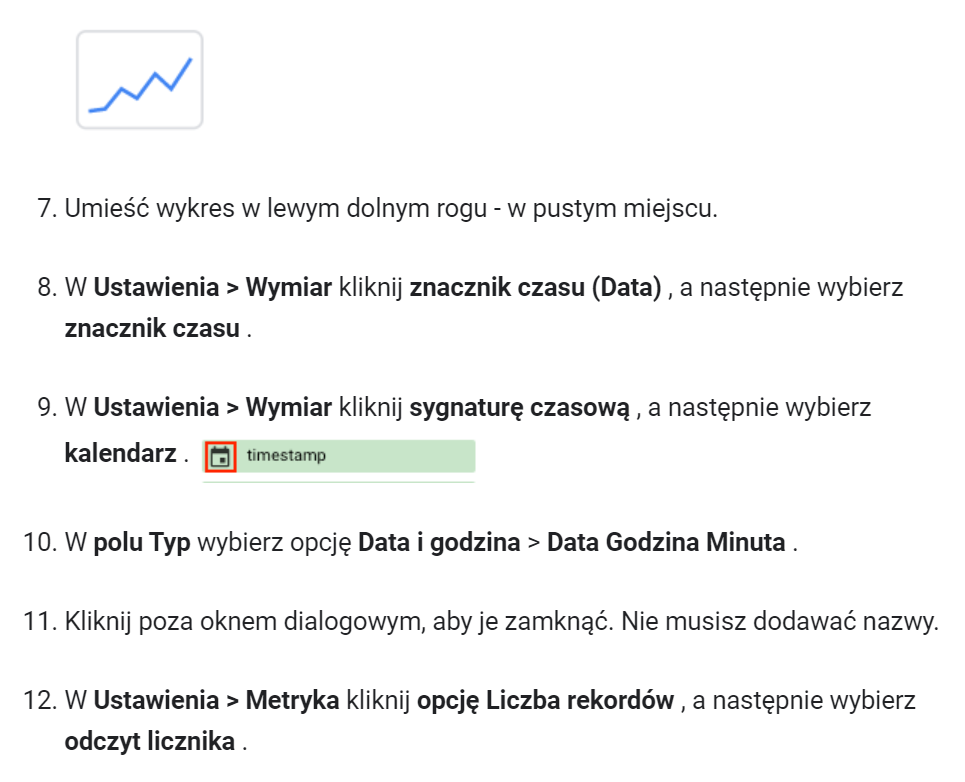